# 📊 Trace Moments of Wishart Matrices vs Catalan Numbers

This notebook simulates the normalized trace moments:

$$
\frac{1}{N} \mathbb{E}\left[\mathrm{Tr}(S^k)\right], \quad \text{where } S = X X^\dagger
$$

We compare them to the Catalan numbers \( C_k \), which describe the limit as \( N \to \infty \).


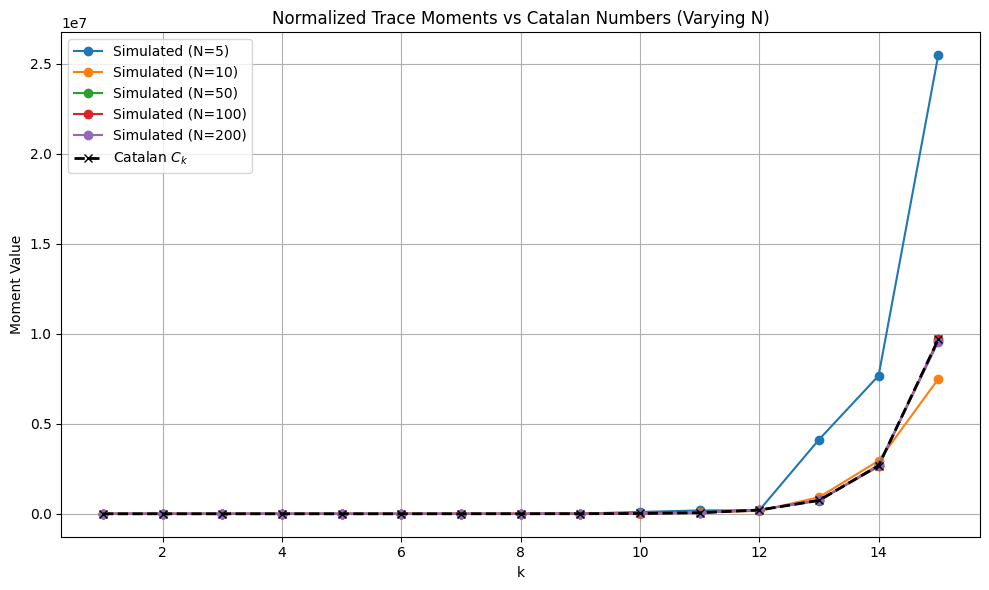

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

def generate_ginibre_matrix(N):
    """Generates an N x N complex Ginibre matrix with entries ~ CN(0, 1/N)."""
    real = np.random.normal(0, 1/np.sqrt(2*N), (N, N))
    imag = np.random.normal(0, 1/np.sqrt(2*N), (N, N))
    return real + 1j * imag

def compute_trace_moment(N, k, trials=100):
    """Computes normalized E[Tr(S^k)] where S = X X† over multiple trials."""
    total = 0
    for _ in range(trials):
        X = generate_ginibre_matrix(N)
        S = X @ X.conj().T
        total += np.trace(np.linalg.matrix_power(S, k)).real
    return total / (trials * N)

def catalan_number(k):
    """Returns the k-th Catalan number."""
    return comb(2*k, k) // (k + 1)

if __name__ == "__main__":
    N_values = [5,10, 50, 100, 200]
    trials = 100
    max_k = 15
    ks = list(range(1, max_k + 1))
    catalan = [catalan_number(k) for k in ks]

    plt.figure(figsize=(10, 6))

    for N in N_values:
        simulated = [compute_trace_moment(N, k, trials) for k in ks]
        plt.plot(ks, simulated, marker='o', label=f"Simulated (N={N})")

    plt.plot(ks, catalan, 'k--', marker='x', label="Catalan $C_k$", linewidth=2)
    plt.xlabel("k")
    plt.ylabel("Moment Value")
    plt.title("Normalized Trace Moments vs Catalan Numbers (Varying N)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


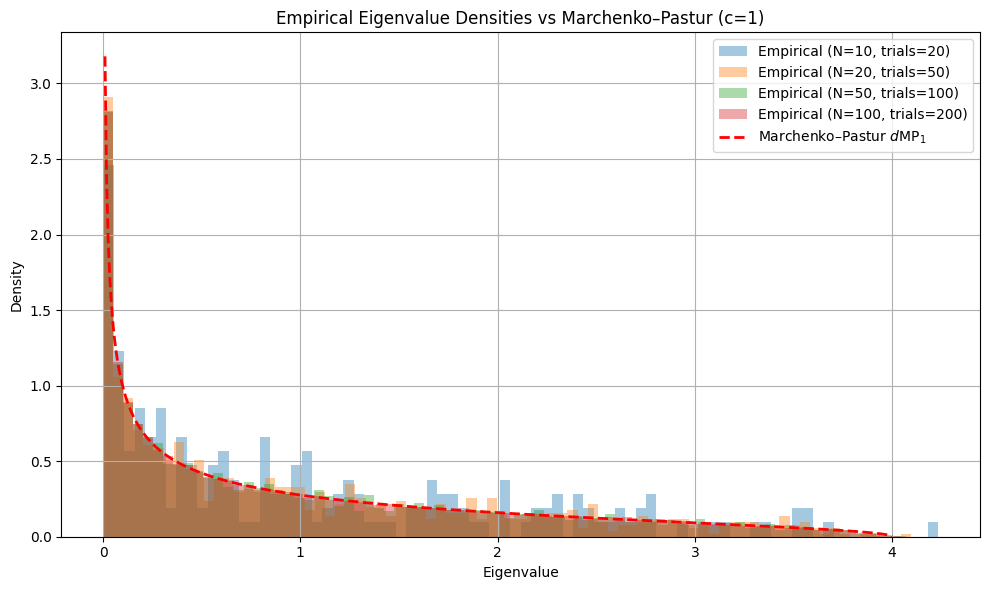

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ginibre_matrix(N):
    """Generates an N x N complex Ginibre matrix with entries ~ CN(0, 1/N)."""
    real = np.random.normal(0, 1/np.sqrt(2*N), (N, N))
    imag = np.random.normal(0, 1/np.sqrt(2*N), (N, N))
    return real + 1j * imag

def simulate_eigenvalues(N, trials=100):
    """Simulates eigenvalues from Wishart ensemble S = X X† for c = 1 (i.e., N = M)."""
    all_eigs = []
    for _ in range(trials):
        X = generate_ginibre_matrix(N)
        S = X @ X.conj().T
        eigs = np.linalg.eigvalsh(S).real
        all_eigs.extend(eigs)
    return np.array(all_eigs)

def marchenko_pastur_pdf_c1(x):
    """MP density with c = 1: ρ(x) = sqrt(4x - x^2) / (2πx) on [0, 4]"""
    density = np.zeros_like(x)
    support = (x > 0) & (x <= 4)
    density[support] = np.sqrt(4 * x[support] - x[support]**2) / (2 * np.pi * x[support])
    return density

if __name__ == "__main__":
    # Try multiple empirical parameters (N, trials)
    configs = [
        (10, 20),
        (20, 50),
        (50, 100),
        (100, 200)
    ]

    x_vals = np.linspace(0.01, 4, 500)
    mp_vals = marchenko_pastur_pdf_c1(x_vals)

    plt.figure(figsize=(10, 6))

    for N, trials in configs:
        eigs = simulate_eigenvalues(N, trials)
        plt.hist(eigs, bins=80, density=True, alpha=0.4,
                 label=f"Empirical (N={N}, trials={trials})")

    plt.plot(x_vals, mp_vals, 'r--', linewidth=2, label=r"Marchenko–Pastur $d\text{MP}_1$")
    plt.xlabel("Eigenvalue")
    plt.ylabel("Density")
    plt.title("Empirical Eigenvalue Densities vs Marchenko–Pastur (c=1)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
